In [1]:
import sys
sys.path.insert(0, "/Users/jubong/git/aiclass/1731036002_jubongkim/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import time
%matplotlib inline
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
start = time.time()
n.learning(max_epoch=20, data=data, batch_size=batch_size, print_period=1, verbose=False)
end = int((time.time() - start))
print(end)

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1227
Epoch   0 Completed - Train Error: 2.308746 - Validation Error: 2.309778 - Test Accuracy: 0.122700
Epoch   1 Completed - Train Error: 0.350223 - Validation Error: 0.376745 - Test Accuracy: 0.892500
Epoch   2 Completed - Train Error: 0.235185 - Validation Error: 0.257981 - Test Accuracy: 0.924500
Epoch   3 Completed - Train Error: 0.205160 - Validation Error: 0.210314 - Test Accuracy: 0.935500
Epoch   4 Completed - Train Error: 0.157415 - Validation Error: 0.180612 - Test Accuracy: 0.944200
Epoch   5 Completed - Train Error: 0.131314 - Validation Error: 0.159217 - Test Accuracy: 0.950300
Epoch   6 Completed - Train Error: 0.188188 - Validation Error: 0.143397 - Test Accuracy: 0.954800
Epoch   7 Completed - Train Error: 0.165970 - Validation Error: 0.131404 - Test Accuracy: 0.957800
Epoch   8 Completed - Train Error: 0.118179 - Validation Error: 0.122177 - Test Accuracy: 0.961600
Epoch   9 Completed - Train Error: 0.113193 - Validation Error: 0.114831 - Test Accur

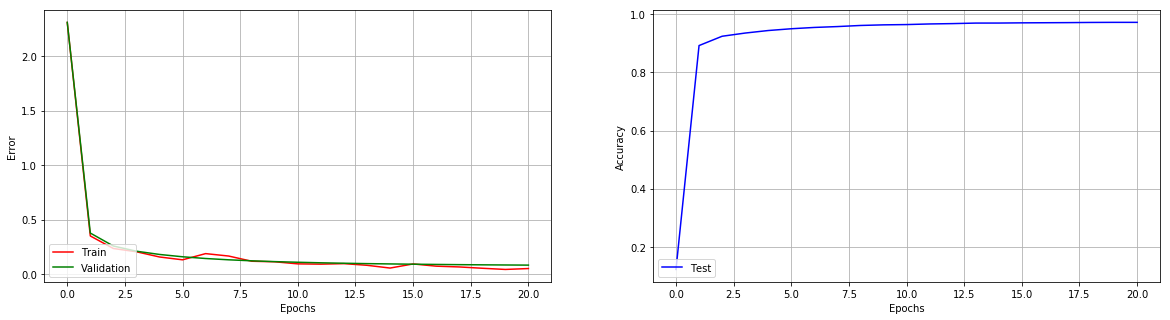

In [5]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 38, Prediction: Three, Ground Truth: Two
False Prediction Index: 149, Prediction: Three, Ground Truth: Two
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 259, Prediction: Zero, Ground Truth: Six
False Prediction Index: 320, Prediction: Seven, Ground Truth: Nine


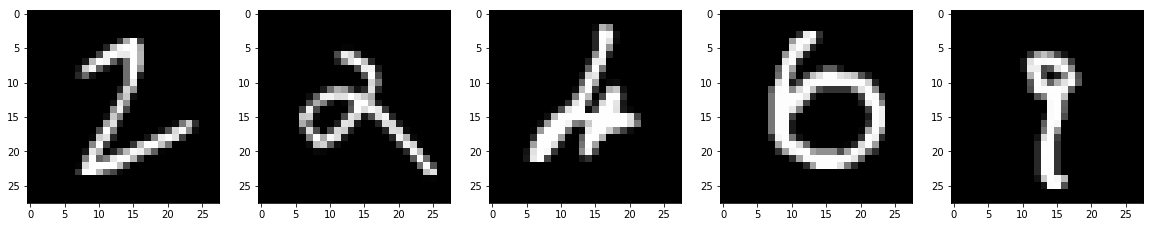

In [6]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

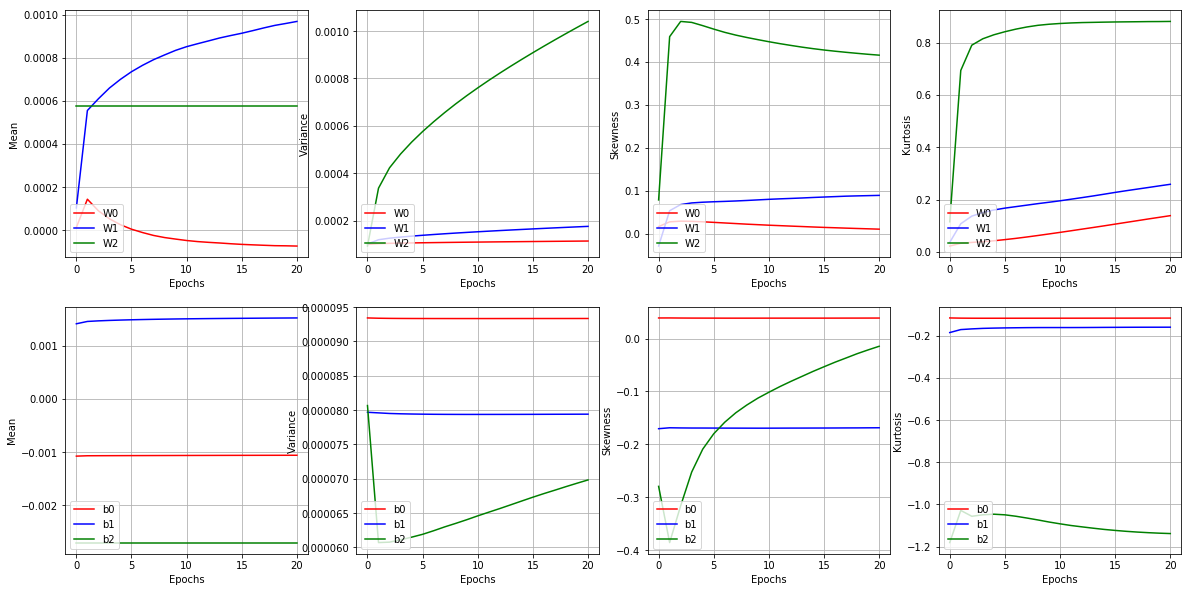

In [7]:
n.draw_param_description(figsize=(20, 10))